In [1]:
import pandas as pd
#행렬 연산 패키지
import numpy as np
import scipy as sp
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

In [2]:
# df_raw = pd.read_csv("C:/Users/osoomin/Desktop/Tel/tele_customer_final.csv")
df_raw = pd.read_csv("C:/Users/osoomin/Desktop/Tel/df_high_danger_final1.csv")
df_raw

,index,CustomerId,Age,Dependents,noReferrals,PaymentMethod,OnlineSecurity,OnlineBackup,TechSupport,UnlimitedData,AvgDownloadGB,ChurnLabel,CustomerLTV,Monthly_charge,AvgRoamCharge,Y_predict
0,12,C-10013,58,No,0,계좌이체,No,No,No,Yes,10,0,5536,79112.0,21130,1.0
1,17,C-10018,72,No,0,계좌이체,No,No,No,Yes,22,0,4432,80762.0,8810,1.0
2,51,C-10053,72,No,0,계좌이체,No,No,No,Yes,23,0,5742,107206.0,49830,1.0
3,67,C-10070,39,No,0,계좌이체,No,Yes,No,Yes,12,0,4800,125896.0,56160,1.0
4,105,C-10109,80,No,0,계좌이체,Yes,Yes,No,Yes,5,0,3033,90914.0,43620,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,6759,C-16939,43,No,0,계좌이체,No,Yes,No,Yes,4,0,4237,90415.0,27570,1.0
330,6766,C-16946,52,No,0,계좌이체,No,Yes,No,Yes,12,0,5781,118319.0,27690,1.0
331,6815,C-16996,53,No,1,계좌이체,Yes,Yes,Yes,Yes,3,0,2429,121791.0,56160,1.0
332,6828,C-17009,75,No,0,이체/메일확인,No,No,No,Yes,19,0,5823,90244.0,45090,1.0


In [3]:
# df_raw = df_raw.reset_index()
# df_raw.drop('index',axis=1,inplace=True)
# df_raw

In [4]:
aa = df_raw[['CustomerId','OnlineSecurity','OnlineBackup','TechSupport','UnlimitedData']]

aa['OnlineSecurity']= df_raw['OnlineSecurity'].map({'Yes':1,'No':0})
aa['OnlineBackup']= df_raw['OnlineBackup'].map({'Yes':1,'No':0})
aa['TechSupport']= df_raw['TechSupport'].map({'Yes':1,'No':0})
aa['UnlimitedData']= df_raw['UnlimitedData'].map({'Yes':1,'No':0})

aa = aa.reset_index()
aa.drop('index',axis=1,inplace=True)
aa

,CustomerId,OnlineSecurity,OnlineBackup,TechSupport,UnlimitedData
0,C-10013,0,0,0,1
1,C-10018,0,0,0,1
2,C-10053,0,0,0,1
3,C-10070,0,1,0,1
4,C-10109,1,1,0,1
...,...,...,...,...,...
329,C-16939,0,1,0,1
330,C-16946,0,1,0,1
331,C-16996,1,1,1,1
332,C-17009,0,0,0,1


In [5]:
SB = []
TU = []

for i in range(len(aa)):
    data = aa.loc[i]
    if data['OnlineSecurity']==1 and data['OnlineBackup']==1:
        SB.append(1)
    else:
        SB.append(0)
    if data['TechSupport']==1 and data['UnlimitedData']==1:
        TU.append(1)
    else:
        TU.append(0)

aa['OnlineSecurity, OnlineBackup'] = SB
aa['TechSupport, UnlimitedData'] = TU
aa

,CustomerId,OnlineSecurity,OnlineBackup,TechSupport,UnlimitedData,"OnlineSecurity, OnlineBackup","TechSupport, UnlimitedData"
0,C-10013,0,0,0,1,0,0
1,C-10018,0,0,0,1,0,0
2,C-10053,0,0,0,1,0,0
3,C-10070,0,1,0,1,0,0
4,C-10109,1,1,0,1,1,0
...,...,...,...,...,...,...,...
329,C-16939,0,1,0,1,0,0
330,C-16946,0,1,0,1,0,0
331,C-16996,1,1,1,1,1,1
332,C-17009,0,0,0,1,0,0


In [6]:
user_ = pd.pivot_table(aa,index=['OnlineBackup','OnlineSecurity','OnlineSecurity, OnlineBackup']
                       ,columns=['TechSupport','UnlimitedData','TechSupport, UnlimitedData']
                       ,values='CustomerId',aggfunc='count')
user_

TechSupport                                                  0           1  \
UnlimitedData                                                0      1    0   
TechSupport, UnlimitedData                                   0      0    0   
OnlineBackup OnlineSecurity OnlineSecurity, OnlineBackup                     
0            0              0                             39.0  202.0  1.0   
             1              0                              1.0    4.0  NaN   
1            0              0                             12.0   57.0  1.0   
             1              1                              NaN    2.0  NaN   

TechSupport                                                    
UnlimitedData                                               1  
TechSupport, UnlimitedData                                  1  
OnlineBackup OnlineSecurity OnlineSecurity, OnlineBackup       
0            0              0                             8.0  
             1              0                             1.0  
1            0              0                             5.0  
             1              1                             1.0

In [7]:
h = df_raw[df_raw['OnlineBackup']=='No']
h=h[h['OnlineSecurity']=='No']
h=h[h['TechSupport']=='No']
h=h[h['UnlimitedData']=='No']
h.shape

(39, 16)

In [8]:
ID = [1,2,3,4]
name = ['OnlineBackup','TechSupport','OnlineSecurity','UnlimitedData']
member = [0,0,0,0]

for i in range(len(df_raw)):
    data = df_raw.loc[i]
    if data['OnlineBackup'] == 'Yes':
        member[0] +=1

    if data['TechSupport'] == 'Yes':
        member[1] +=1

    if data['OnlineSecurity'] == 'Yes':
        member[2] +=1

    if data['UnlimitedData'] == 'Yes':
        member[3] +=1

service = pd.DataFrame()
service['service_id'] = ID
service['service_code'] = name
service['members'] = member
service.round(3)

,service_id,service_code,members
0,1,OnlineBackup,78
1,2,TechSupport,17
2,3,OnlineSecurity,9
3,4,UnlimitedData,280


In [9]:
users = []
services = []

for i in range(len(df_raw)):
    n=[]
    data = df_raw.loc[i]
    idd = data['CustomerId']
    id = int(idd[-5:])
    users.append(id)
    if data['OnlineBackup'] == 'Yes':
        n.append('OB')
    if data['TechSupport'] == 'Yes':
        n.append('TS')
    if data['OnlineSecurity'] == 'Yes':
        n.append('OS')
    if data['UnlimitedData'] == 'Yes':
        n.append('UD')
    services.append(n)
    
asso = pd.DataFrame()
asso['user_id'] = users
asso['service_code'] = services
asso

,user_id,service_code
0,10013,[UD]
1,10018,[UD]
2,10053,[UD]
3,10070,"[OB, UD]"
4,10109,"[OB, OS, UD]"
...,...,...
329,16939,"[OB, UD]"
330,16946,"[OB, UD]"
331,16996,"[OB, TS, OS, UD]"
332,17009,[UD]


In [10]:
service_id = []
aa= []

for i in range(len(asso)):
    data = asso.loc[i]
    a=''
    for j in data['service_code']:
        a += str(j)+','
    service_id.append(a)

for i in range(len(asso)):
    aa.append(len(asso.iloc[i]['service_code']))

asso['service_id']=service_id
asso['len']=aa
asso = asso.sort_values(by='len')
asso

,user_id,service_code,service_id,len
166,13585,[],,0
207,14397,[],,0
301,16495,[],,0
299,16473,[],,0
183,13939,[],,0
...,...,...,...,...
307,16566,"[OB, TS, UD]","OB,TS,UD,",3
175,13789,"[OB, OS, UD]","OB,OS,UD,",3
165,13572,"[OB, TS, UD]","OB,TS,UD,",3
139,13030,"[TS, OS, UD]","TS,OS,UD,",3


In [11]:
asso['service_code'].value_counts()

[UD]                202
[OB, UD]             57
[]                   39
[OB]                 12
[TS, UD]              8
[OB, TS, UD]          5
[OS, UD]              4
[OB, OS, UD]          2
[OS]                  1
[TS]                  1
[OB, TS]              1
[TS, OS, UD]          1
[OB, TS, OS, UD]      1
Name: service_code, dtype: int64

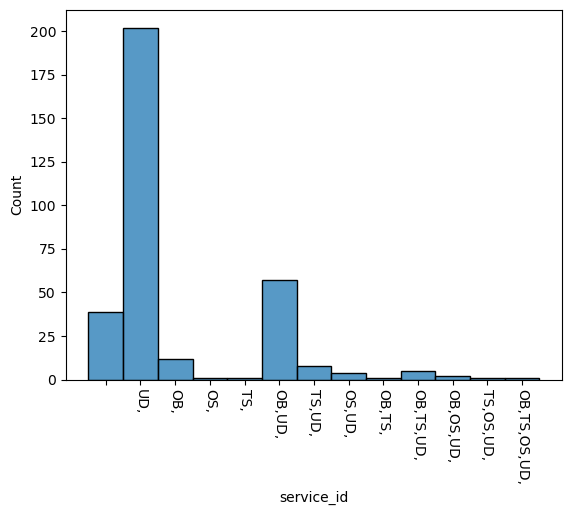

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# plt.figure(figsize=(10,5))
sns.histplot(x=asso['service_id'])
plt.xticks(rotation=-90)
# sns.set(font_scale=1)
plt.show()

### 가설검증

In [13]:
df_raw = pd.read_csv("C:/Users/osoomin/Desktop/Tel/df_high_danger_final2.csv")
df_raw['UnlimitedData']= df_raw['UnlimitedData'].map({'Yes':'No','No':'No'})
df_raw['UnlimitedData'].value_counts()

No    334
Name: UnlimitedData, dtype: int64

In [14]:
users = []
services = []

for i in range(len(df_raw)):
    n=[]
    data = df_raw.loc[i]
    idd = data['CustomerId']
    id = int(idd[-5:])
    users.append(id)
    if data['OnlineBackup'] == 'Yes':
        n.append('OB')
    if data['TechSupport'] == 'Yes':
        n.append('TS')
    if data['OnlineSecurity'] == 'Yes':
        n.append('OS')
    if data['UnlimitedData'] == 'Yes':
        n.append('UD')
    services.append(n)
    
asso = pd.DataFrame()
asso['user_id'] = users
asso['service_code'] = services
asso

,user_id,service_code
0,10013,[]
1,10018,[]
2,10053,[]
3,10070,[OB]
4,10109,"[OB, OS]"
...,...,...
329,16939,[OB]
330,16946,[OB]
331,16996,"[OB, TS, OS]"
332,17009,[]


In [15]:
service_id = []
aa= []

for i in range(len(asso)):
    data = asso.loc[i]
    a=''
    for j in data['service_code']:
        a += str(j)+','
    service_id.append(a)

for i in range(len(asso)):
    aa.append(len(asso.iloc[i]['service_code']))

asso['service_id']=service_id
asso['len']=aa
asso = asso.sort_values(by='len')
asso

,user_id,service_code,service_id,len
0,10013,[],,0
199,14204,[],,0
200,14217,[],,0
204,14310,[],,0
205,14311,[],,0
...,...,...,...,...
280,15941,"[OB, TS]","OB,TS,",2
165,13572,"[OB, TS]","OB,TS,",2
4,10109,"[OB, OS]","OB,OS,",2
139,13030,"[TS, OS]","TS,OS,",2


In [16]:
asso['service_code'].value_counts()

[]              241
[OB]             69
[TS]              9
[OB, TS]          6
[OS]              5
[OB, OS]          2
[TS, OS]          1
[OB, TS, OS]      1
Name: service_code, dtype: int64

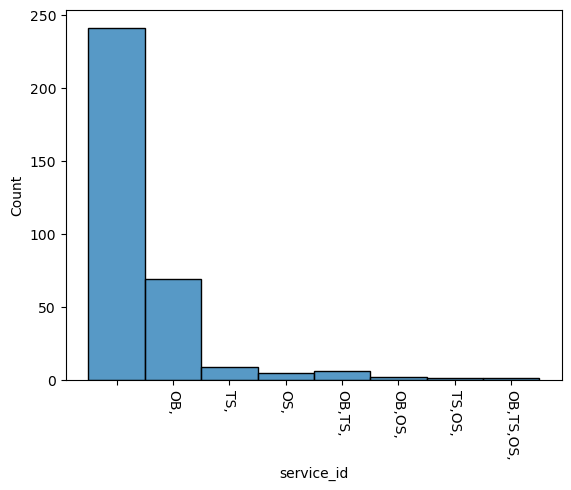

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# plt.figure(figsize=(10,5))
sns.histplot(x=asso['service_id'])
plt.xticks(rotation=-90)
# sns.set(font_scale=1)
plt.show()